# Data visualization for federated learning deployments and simulations

In [5]:
import json
import matplotlib.pyplot as plt
import scienceplots

In [14]:
plt.style.use(['ieee'])
# plt.style.use(['science','ieee'])

In [7]:
import json

class History:
    def __init__(self, losses_distributed, losses_centralized, metrics_distributed, metrics_centralized):
        self.losses_distributed = losses_distributed
        self.losses_centralized = losses_centralized
        self.metrics_distributed = metrics_distributed
        self.metrics_centralized = metrics_centralized

    @staticmethod
    def read(filepath):
        with open(filepath, 'r') as file:
            data = json.load(file)
        return History(
            losses_distributed=data.get('losses_distributed', []),
            losses_centralized=data.get('losses_centralized', []),
            metrics_distributed=data.get('metrics_distributed', {}),
            metrics_centralized=data.get('metrics_centralized', {})
        )

    @staticmethod
    def write(history, filepath):
        with open(filepath, 'w') as file:
            json.dump(history.__dict__, file, indent=4)

    def __repr__(self):
        return json.dumps(self.__dict__, indent=4)


In [8]:
LOGS_FOLDER = 'logs/run_4'
history = History.read(f'{LOGS_FOLDER}/history-data.json')

In [9]:
print(history)

{
    "losses_distributed": [
        [
            1,
            181.4040985107422
        ],
        [
            2,
            150.8985366821289
        ]
    ],
    "losses_centralized": [
        [
            0,
            721.513747215271
        ],
        [
            1,
            519.190474152565
        ],
        [
            2,
            436.26925069093704
        ]
    ],
    "metrics_distributed": {
        "accuracy": [
            [
                1,
                0.387521631347461
            ],
            [
                2,
                0.49969900039984005
            ]
        ],
        "acc": [
            [
                1,
                0.387521631347461
            ],
            [
                2,
                0.49969900039984005
            ]
        ],
        "rec": [
            [
                1,
                0.387521631347461
            ],
            [
                2,
                0.49969900039984005
            ]

In [22]:
class Metric:
    def __init__(self, key, label = "", color = "b", marker = "o", linestyle='-'):
        self.key = key
        self.label = label if label else key
        self.color = color
        self.marker = marker
        self.linestyle = linestyle
        
    def modify(self, label = None, color = None, marker = None, linestyle = None):
        self.label = label if label else self.label
        self.color = color if color else self.color
        self.marker = marker if marker else self.marker
        self.linestyle = linestyle if linestyle else self.linestyle
        return self


accuracy = Metric(key='accuracy', label='Accuracy', color='b', marker='o')
loss = Metric(key='loss', label='Loss', color='r', marker='x')
precision = Metric(key='prec', label='Precision', color='g', marker='s')
recall = Metric(key='rec', label='Recall', color='c', marker='^')
f1 = Metric(key='f1', label='F1 Score', color='m', marker='D')


In [25]:

def plot_single_metric(history, metrics):
    """
    Plots a single metric from the History object for both distributed and centralized systems.
    
    Args:
    history (History): The History object containing the metrics data.
    metric_name (str): The key for the metric to be plotted ('accuracy', 'loss', 'rec', 'prec', 'f1').
    label (str): The label for the plot, which describes the metric.
    """
    plt.figure(figsize=(10, 6))
    
    def plot(data, metric):
        rounds_distributed, values_distributed = zip(*data)
        plt.plot(rounds_distributed, values_distributed, label=metric.label, color=metric.color, marker=metric.marker, linestyle=metric.linestyle)
    
    # losses_centralized = history.losses_centralized
    # losses_distributed = history.losses_distributed
    # 
    # if losses_centralized:
    #     plot(losses_centralized, loss.modify(label='Centralized Loss'))
    # if losses_distributed:
    #     plot(losses_distributed, loss.modify(label='Distributed Loss'))
    
    for metric in metrics:
        metrics_distributed = history.metrics_distributed.get(metric.key, [])
        metrics_centralized = history.metrics_centralized.get(metric.key, [])
    
        if metrics_distributed:
            plot(metrics_distributed, metric.modify(label=f'Distributed {metric.label}'))
        if metrics_centralized:
            plot(metrics_centralized, metric.modify(label=f'Centralized {metric.label}'))

    plt.title('Metrics per Round')
    plt.xlabel('Round Number')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


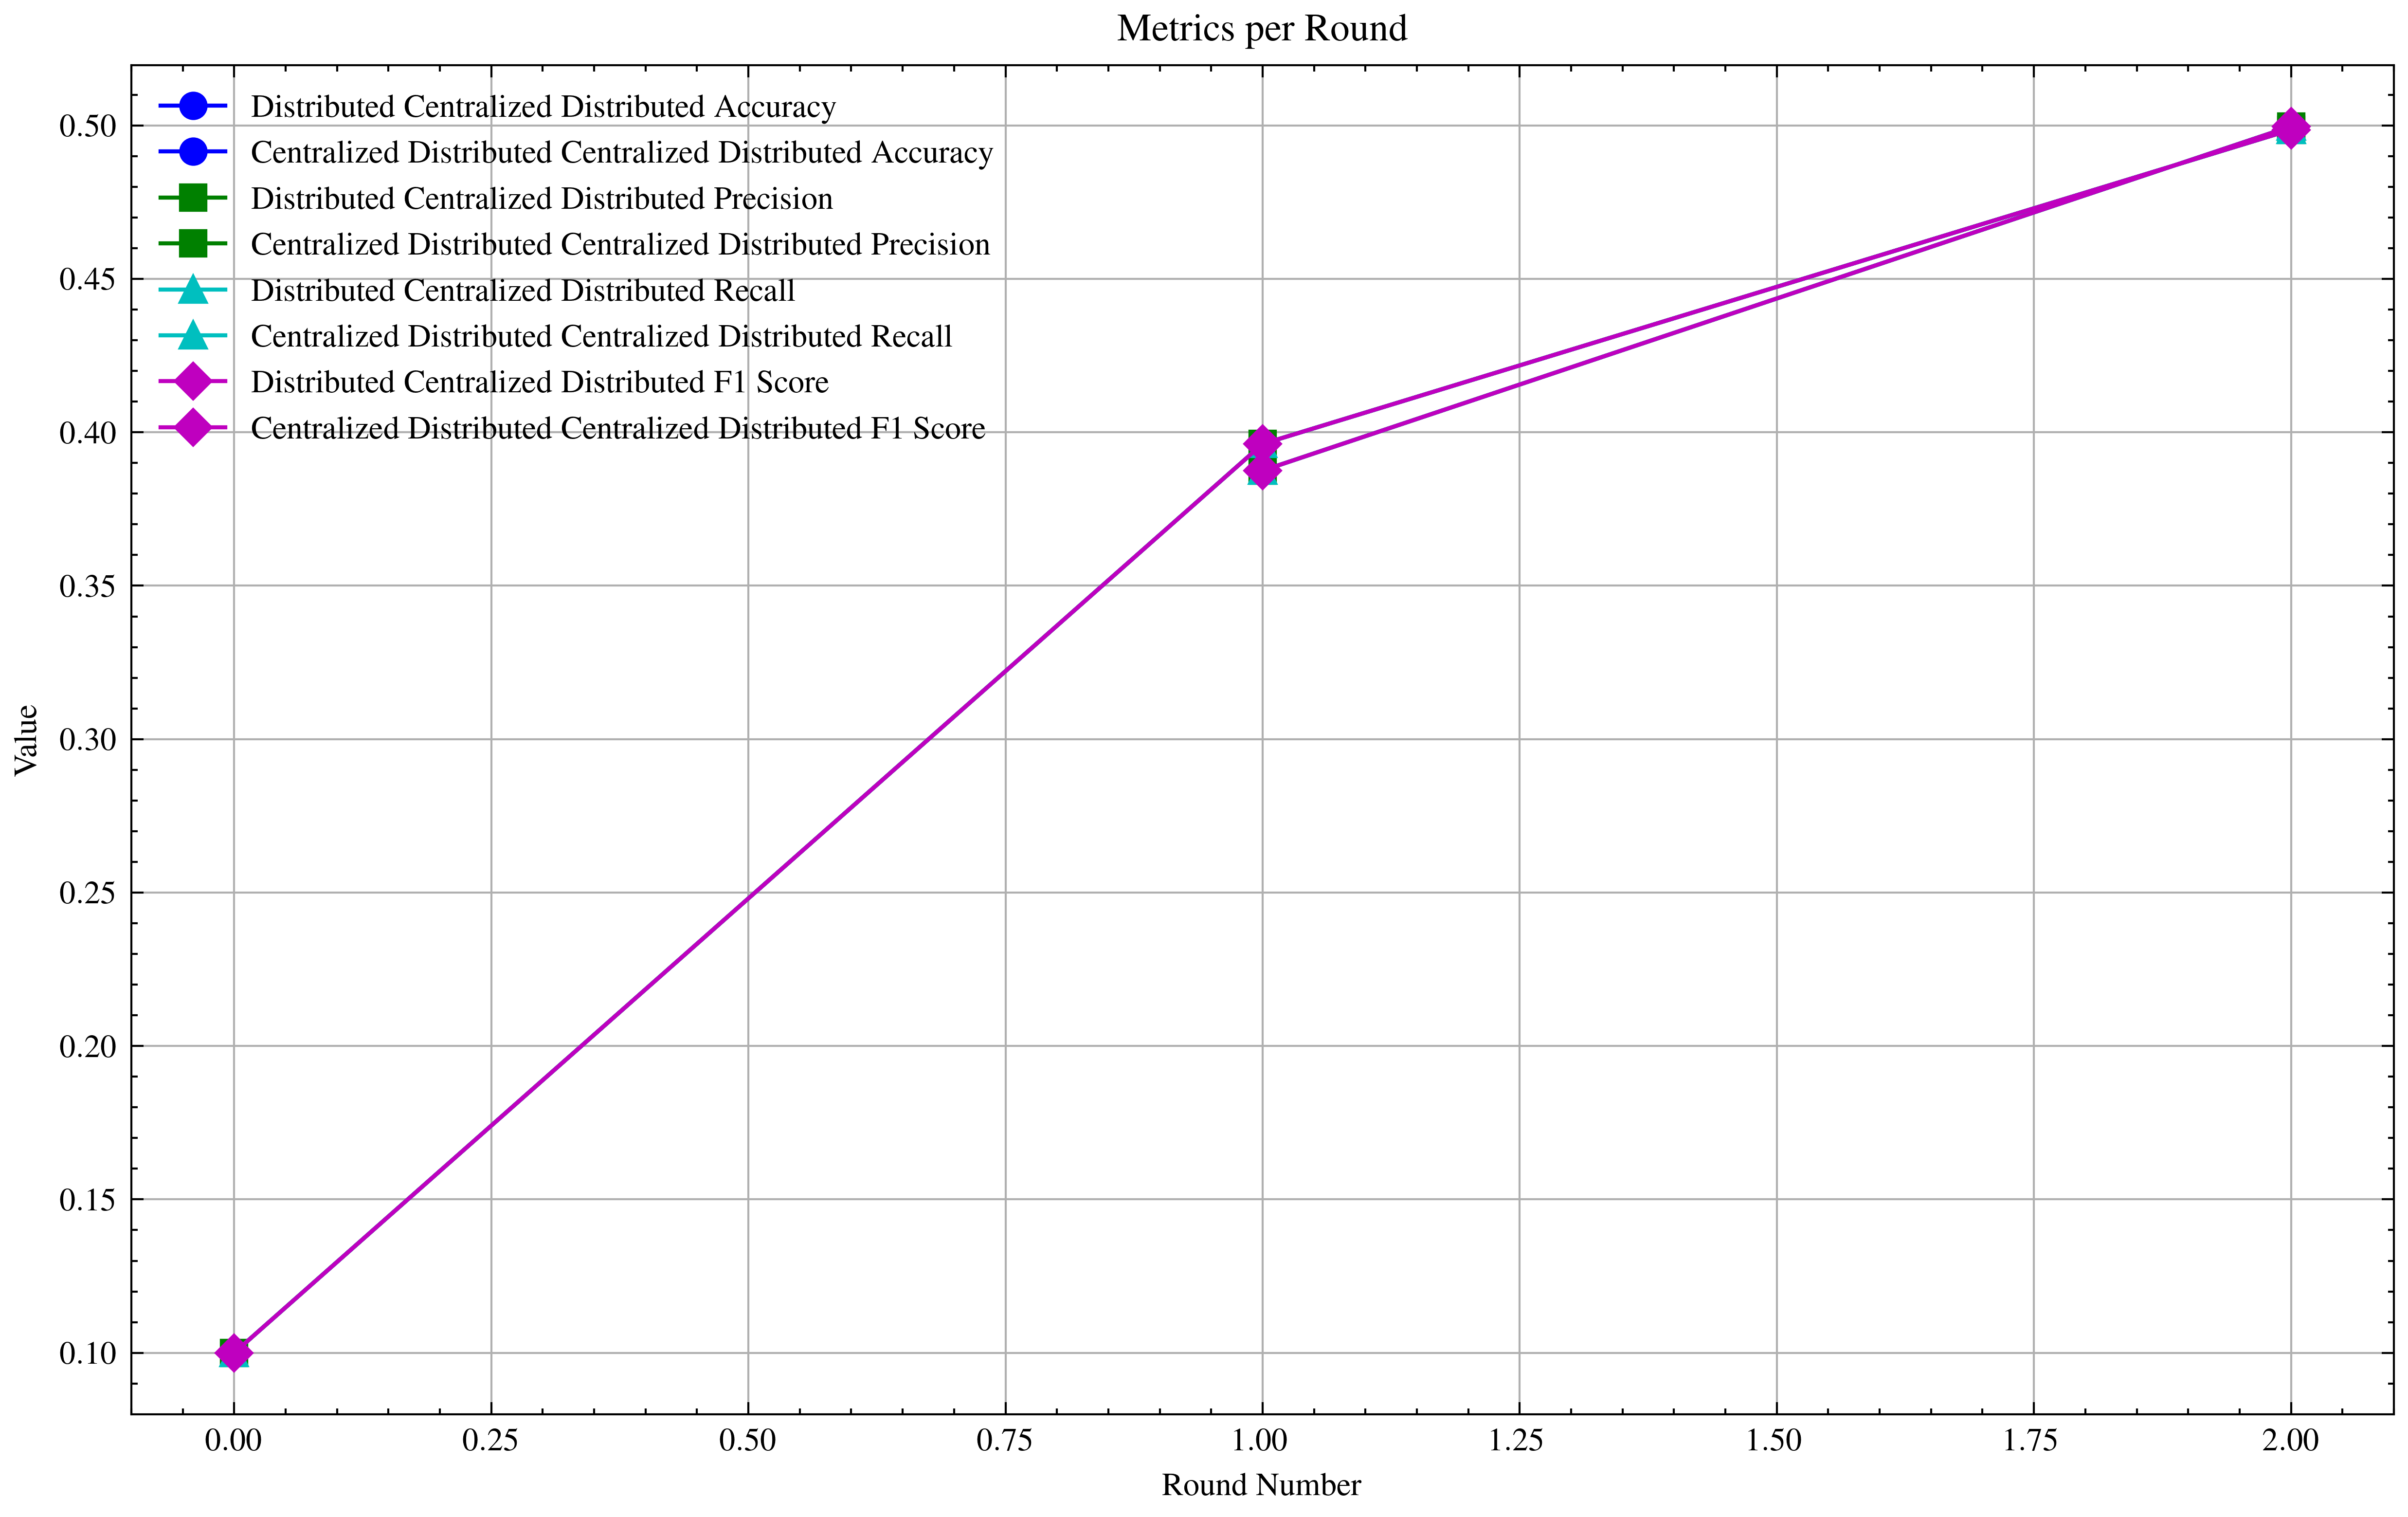

In [26]:

plot_single_metric(history, [accuracy, loss, precision, recall, f1])